In [1]:
import numpy as np
import pickle

# List of file numbers to analyze
file_numbers = [1, 2, 4, 8, 15, 20, 23]

# Containers for all trials across files
all_predict = []
all_left = []
all_right = []
all_attend = []

for file_number in file_numbers:
    file_path = f'C:/Users/joshu/PartIIIProject/RSNNdale_attention_{file_number}_attention_test'
    data = pickle.load(open(file_path, 'rb'))
    label_predict = data['label_predict'][0]
    label_left = data['label_left'][0]
    label_right = data['label_right'][0]
    attend_01 = data['attend'][0]
    omitted = data['omit'][0]
    # Only consider non-omitted trials where left != right (as in your data selection)
    valid = (omitted == 0) & (label_left != label_right)
    all_predict.append(label_predict[valid])
    all_left.append(label_left[valid])
    all_right.append(label_right[valid])
    all_attend.append(attend_01[valid])

# Concatenate across all files
all_predict = np.concatenate(all_predict)
all_left = np.concatenate(all_left)
all_right = np.concatenate(all_right)
all_attend = np.concatenate(all_attend)

In [2]:
# Compute matches for left and right attention separately
left_mask = (all_attend == 0)
right_mask = (all_attend == 1)

left_matches = (all_predict[left_mask] == all_left[left_mask])
right_matches = (all_predict[right_mask] == all_right[right_mask])

percent_match_left = 100 * np.mean(left_matches) if left_matches.size > 0 else float('nan')
percent_match_right = 100 * np.mean(right_matches) if right_matches.size > 0 else float('nan')

total_trials = len(all_predict)
total_left = np.sum(left_mask)
total_right = np.sum(right_mask)

print(f"Percentage of label_predict values matching the attended label for LEFT attention: {percent_match_left:.2f}% ({np.sum(left_matches)}/{total_left})")
print(f"Percentage of label_predict values matching the attended label for RIGHT attention: {percent_match_right:.2f}% ({np.sum(right_matches)}/{total_right})")
print(f"Total trials analyzed: {total_trials}")
print(f"Total left-attention trials: {total_left}")
print(f"Total right-attention trials: {total_right}")

Percentage of label_predict values matching the attended label for LEFT attention: 69.35% (2276/3282)
Percentage of label_predict values matching the attended label for RIGHT attention: 67.37% (2337/3469)
Total trials analyzed: 6751
Total left-attention trials: 3282
Total right-attention trials: 3469


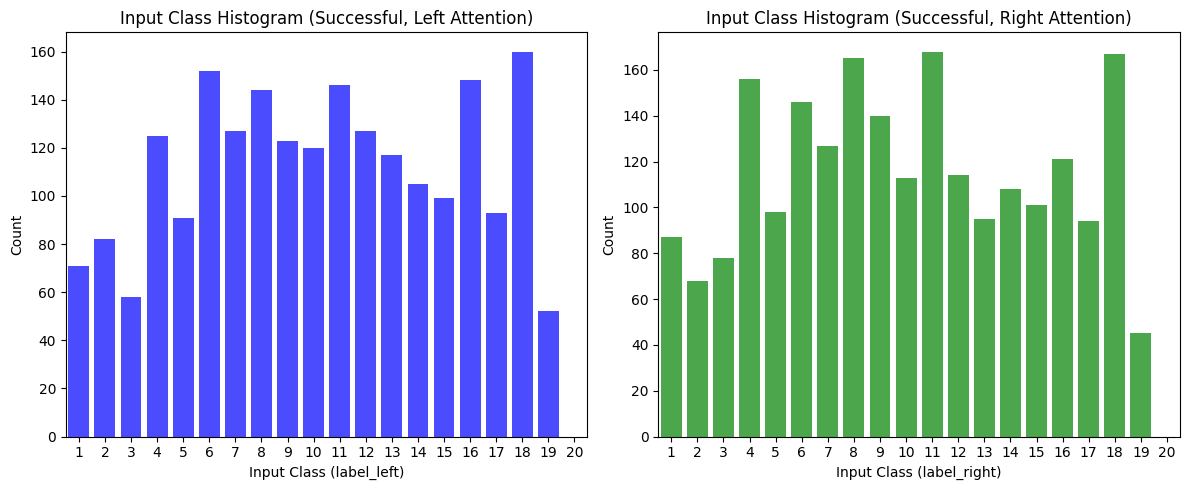

In [12]:
import matplotlib.pyplot as plt

# For left attention: successful = predicted == label_left
left_mask = (all_attend == 0)
left_success = left_mask & (all_predict == all_left)
# For right attention: successful = predicted == label_right
right_mask = (all_attend == 1)
right_success = right_mask & (all_predict == all_right)

# Gather input classes for successful classifications
left_input_classes = all_left[left_success]
right_input_classes = all_right[right_success]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(left_input_classes, bins=np.arange(0.5, 20.5+1, 1), color='blue', alpha=0.7, rwidth=0.8)
plt.title('Input Class Histogram (Successful, Left Attention)')
plt.xlabel('Input Class (label_left)')
plt.ylabel('Count')
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0.5, 20.5)

plt.subplot(1,2,2)
plt.hist(right_input_classes, bins=np.arange(0.5, 20.5+1, 1), color='green', alpha=0.7, rwidth=0.8)
plt.title('Input Class Histogram (Successful, Right Attention)')
plt.xlabel('Input Class (label_right)')
plt.ylabel('Count')
plt.xticks(np.arange(1, 21, 1))
plt.xlim(0.5, 20.5)

plt.tight_layout()
plt.show()
